# 7. inheritance

## 7.1 학습내용

### 7.1.1 목표

* hfj-7+8 + ?10
* 상속을 구현할 수 있다.
* 인터페이스 다형성을 사용할 수 있다.
* 클래스 다형성을 사용할 수 있다.
* 연관관계, 상속관계를 구별해서 사용할 수 있다.


### 7.1.2 문제

* 문제 oo-1: 도형을 선택하여 그룹을 만들 수 있다. 선택된 도형을 알아내기. (연관 vs 상속)
* 문제 oo-2: 상속을 사용하여 거북이를 구현한다 (상속, protected).
* 문제 oo-3: 원의 면적을 계산하기 (상속)
* 문제 oo-4: 클래스 상속을 사용하여 도형의 면적을 구하기 (abstract class)
* 문제 oo-5: 객체를 배열로 저장해서, sayHello() (객체의 배열)
* 문제 oo-6: 도형을 다형적으로 면적 계산하기 (다형성, instatnceOf)
* 문제 oo-7: equals를 구현한다.
* 문제 oo-8: 강의시간표를 구현한다 (NullSubjet)

### 7.1.3 연습

* mini: **game** 상속을 사용하여 윷놀이, 주사위를 할 수 있게 수정한다.
* mini: **shape**

## 7.1 상속

### 7.1.1 상속이란?

* 객체지향 프로그래밍은 '상속'이라고 하는 중요한 특징을 가진다.
* 상속은 부모클래스-자식클래스의 계층구조로 표현할 수 있다.
    * 부모클래스는 superclass, base class라고 한다.
    * 자식클래스는 subclass, derived class라고 한다.
    * 이러한 계층구조를 통해 공통되는 부분을 부모클래스에서, 다른 부분은 자식클래스에서 구현한다.
* 상속을 집합으로 이해해 보자.
    * 부모 - (부모 $\cap$자식) = $\emptyset$
        * 자식클래스는 부모클래스의 모든 요소를 가져야 한다.
        * 부모클래스는 자식클래스와 공통부분을 가진다.
        * 공통적이지 않은 요소는 자식클래스가 가진다.
        * 부모클래스의 속성, 함수를 모두 상속받는다.
* 여러 부모를 가질 수 있지만, 자바에서는 다중 상속은 없다.

### 7.1.2 단순한 상속의 구현

* 커피빈 클래스
    * 커피빈은 Robusta, Arabica로 나뉜다.
    * Robusta는 인스턴트 커피를 만들 때 주로 사용되며, 아프리카, 아시아 지역에서 생산된다.
    * Arabica는 품질이 좋은 커피를 만드는 재료로 사용되며, 주 생산지는 라틴 아메리카 지역이다.
    * 이 두 클래스는 서로 공통점이 많다. 클래스로 구현하려면, 속성 및 함수가 서로 비슷한 점이 많다.

difference | Robusta | Arabica
----------|----------|----------
altitude(m) | 0-800 | 600-2200
caffeine | more (2.2%) | less (1.2%)
price | half less | more
shape | more circular | oval
production area | Africa, Asia (vietnam) | Latin Amerca (Brazail, Colombia)
primary use | instant | gourmet


### 7.1.2 UML로 나타내기

In [1]:
import iplantuml

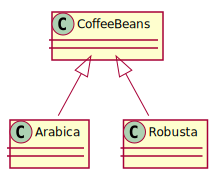

In [2]:
%%plantuml
@startuml
class CoffeeBeans
class Arabica
class Robusta
CoffeeBeans <|-- Arabica
CoffeeBeans <|-- Robusta
@enduml

### 7.1.3 상속 구현

* 커피빈을 구현한다. 상속을 이해하기 위해 사례를 단순화한다.
    * CoffeeBeans는 부모클래스 Arabica는 자식클래스이다.
    * 그 관계는 'extends'로 구현한다.
        ```
        class Arabica extends CoffeeBeans
        ```

In [7]:
class CoffeeBeans {
    String species="Coffee";
    void print() {
        System.out.println(species);
    }
    void setSepecies(String s) {
        species=s;
    }
}
class Arabica extends CoffeeBeans  {

}
class Robusta extends CoffeeBeans {
    String species="Robusta";
}

 class CoffeeBeans {
     String species="Coffee";
     void print() {
         System.out.println(species);
     }
     void setSepecies(String s) {
         species=s;
     }
 }
|  Added class CoffeeBeans

 class Arabica extends CoffeeBeans  {
 
 }
|  Added class Arabica

 class Robusta extends CoffeeBeans {
     String species="Robusta";
 }
|  Added class Robusta



* 각 클래스의 instance 생성

In [10]:
CoffeeBeans c=new CoffeeBeans();
Arabica a=new Arabica();
Robusta r=new Robusta();

 CoffeeBeans c=new CoffeeBeans();
|  Added variable c of type CoffeeBeans with initial value CoffeeBeans@14bf9759

 Arabica a=new Arabica();
|  Added variable a of type Arabica with initial value Arabica@402a079c

 Robusta r=new Robusta();
|  Added variable r of type Robusta with initial value Robusta@4cf777e8



* 자식클래스는 부모클래스의 함수를 사용할 수 있다.
    * Arabica, Robusta는 자신의 print()함수를 정의하지 않았다.
    * 부모클래스의 함수를 호출한다.

In [10]:
c.print();
a.print();
r.print();

 c.print();
Coffee

 a.print();
Coffee

 r.print();
Coffee



* 자식클래스의 print()함수를 재정의 한다.
* Method overriding
    * 부모클래스가 가지고 있는 함수를 자식클래스에서 재정의할 수 있다.
    * 재정의하는 함수는 부모클래스가 가지고 있는 함수이다.
    * 부모클래스의 함수이름, 함수입력변수, 반환변수를 동일하게 한다.

In [11]:
class Arabica extends CoffeeBeans  {
    void setSpecies(String s) {
        species=s;
    }
    void print() {
        System.out.println("Arabia: overriding coffee..");
    }
}

 class Arabica extends CoffeeBeans  {
     void setSpecies(String s) {
         species=s;
     }
     void print() {
         System.out.println("Arabia: overriding coffee..");
     }
 }
|  Replaced class Arabica
|    Update replaced variable a, reset to null
|    Update overwrote class Arabica



In [11]:
Arabica a=new Arabica();

 Arabica a=new Arabica();
|  Modified variable a of type Arabica with initial value Arabica@2f686d1f
|    Update overwrote variable a



* 재정의된 함수를 호출하는 경우, 
    * Arabica클래스의 경우, 재정의한 함수가 있고, 이를 호출한다.
    * Robusta클래스는 재정의한 함수가 없으면, 부모클래스의 함수를 호출한다.

In [12]:
a.print();
r.print();

 a.print();
Arabica: overriding coffee..

 r.print();
Coffee



* overloading과 overriding
    * 상속관계에서 함수를 정의할 때, 이름은 같지만 입력변수가 다른 경우 overloading이라고 한다.
    * 부모클래스의 print()를 자식클래스에서 재정의하는 경우는 앞서 설명한 overriding
    * overriding은 컴파일 시점에 어느 함수를 사용할지 결정될 수 없다.
    * overloading - 자식클래스에서 부모클래스의 print()함수를 print(String s)로 구현

구분 | overriding | overloading
--------|--------|--------
함수이름 | 같다 | 같다
입력변수 argument | 같다 | 다르다
구별 시점 | 실행 runtime | 컴파일 compile time

In [16]:
class Arabica extends CoffeeBeans  {
    void setSpecies(String s) {
        species=s;
    }
    void print() {
        System.out.println("Arabica: overriding coffee..");
    }
    void print(String s) {
        System.out.printf("%s: %s", species, s);
    }
}

 class Arabica extends CoffeeBeans  {
     void setSpecies(String s) {
         species=s;
     }
     void print() {
         System.out.println("Arabica: overriding coffee..");
     }
     void print(String s) {
         System.out.printf("%s: %s", species, s);
     }
 }
|  Modified class Arabica
|    Update overwrote class Arabica



In [17]:
Arabica a=new Arabica();
a.setSpecies("Arabica");
a.print("better quality")

 Arabica a=new Arabica();
|  Modified variable a of type Arabica with initial value Arabica@ff5b51f
|    Update overwrote variable a

 a.setSpecies("Arabica");

 a.print("better quality")
Arabica: better quality


* casting
    * upcasting을 하고 함수를 호출하는 경우, 부모의 함수를 호출할까? 자신의 함수를 호출할까?
    * 함수가 재정의 되어 있는 경우, 자신의 재정의된 함수를 호출한다.

In [14]:
CoffeeBeans ca = new Arabica();
ca.print();

 CoffeeBeans ca = new Arabica();
|  Added variable ca of type CoffeeBeans with initial value Arabica@4566e5bd

 ca.print();
Arabia: overriding coffee..



* visibility
    * 부모클래스의 속성을 private으로 하는 경우는 자식클래스라고 해도 사용할 수 없다.
    * 상속관계에서 부모클래스의 속성을 protected로 해서 자식클래스가 사용할 수 있게 한다.

In [13]:
class CoffeeBeans {
    private String species="Coffee";
    void print() {
        System.out.println(species);
    }
    void setSepecies(String s) {
        species=s;
    }
}

class Robusta extends CoffeeBeans {
    void print() {
        System.out.printf("%s overriding coffee..",species);
    }
}

 }
|  Error:
|  species has private access in CoffeeBeans
|          System.out.printf("Exception in thread "main" java.util.MissingFormatArgumentException: Format specifier '%s'
	at java.util.Formatter.format(java.base@9-internal/Formatter.java:2524)
	at java.io.PrintStream.format(java.base@9-internal/PrintStream.java:974)
	at java.io.PrintStream.printf(java.base@9-internal/PrintStream.java:873)
	at jdk.internal.jshell.tool.JShellTool.rawout(jdk.jshell@9-internal/JShellTool.java:230)
	at jdk.internal.jshell.tool.JShellTool.hard(jdk.jshell@9-internal/JShellTool.java:240)
	at jdk.internal.jshell.tool.JShellTool.lambda$handleEvent$70(jdk.jshell@9-internal/JShellTool.java:1832)
	at java.util.ArrayList$ArrayListSpliterator.forEachRemaining(java.base@9-internal/ArrayList.java:1477)
	at java.util.stream.ReferencePipeline$Head.forEach(java.base@9-internal/ReferencePipeline.java:591)
	at jdk.internal.jshell.tool.JShellTool.handleEvent(jdk.jshell@9-internal/JShellTool.java:1832)
	at jdk.interna

In [16]:
class CoffeeBeans {
    protected String species="Coffee";
    void print() {
        System.out.println(species);
    }
    void setSepecies(String s) {
        species=s;
    }
}

class Robusta extends CoffeeBeans {
    void print() {
        System.out.printf("%s: overriding coffee..",species);
    }
}

 class CoffeeBeans {
     protected String species="Coffee";
     void print() {
         System.out.println(species);
     }
     void setSepecies(String s) {
         species=s;
     }
 }
|  Modified class CoffeeBeans
|    Update overwrote class CoffeeBeans

 

 class Robusta extends CoffeeBeans {
     void print() {
         System.out.printf("%s: overriding coffee..",species);
     }
 }
|  Modified class Robusta
|    Update overwrote class Robusta



* protected 속성을 사용해서, 재정의한 print()함수를 호출한다.

In [17]:
Robusta r=new Robusta();

r.print();

 Robusta r=new Robusta();
|  Modified variable r of type Robusta with initial value Robusta@1e127982
|    Update overwrote variable r

 

 r.print();
Coffee: overriding coffee..


## 7.2 Constructor

* 상속관계에서 생성자를 정의할 경우:
    * 기본 생성자는 입력변수가 없다 (default constructor)
    * 자식클래스의 생성자를 새로 정의할 때, 부모클래스의 생성자를 사용할 수 있다.
        * super 명령어를 사용할 수 있다.

* 도형 사례
    * 사각형과 육면체의 상속관계를 구현한다.

In [4]:
import iplantuml

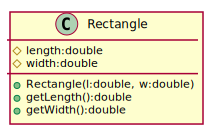

In [5]:
%%plantuml
@startuml
class Rectangle {
    length:double
    width:double
    +Rectangle(l:double, w:double)
    +getLength():double
    +getWidth():double
}
@enduml

* 부모클래스를 구현한다.

In [1]:
class Rectangle {
    double length;
    double width;
    public Rectangle(double l, double w) {
        this.length=l;
        this.width=w;
    }
    public double getLength() {
        return length;
    }
    public double getWidth() {
        return width;
    }
}

 class Rectangle {
     protected double length;
     protected double width;
     public Rectangle(double l, double w) {
         this.length=l;
         this.width=w;
     }
     public double getLength() {
         return length;
     }
     public double getWidth() {
         return width;
     }
 }
|  Added class Rectangle



* Cube 하위클래스를 만들어 보자.
    * 직육면체는 Length × Width × Height가 서로 다른다.
    * 정육면체 (Square Prism)는 Length × Width × Height가 모두 동일하다.
    * 생성자를 정의할 경우, 사각형의 길이, 너비를 사용할 수 있다.

In [1]:
import iplantuml

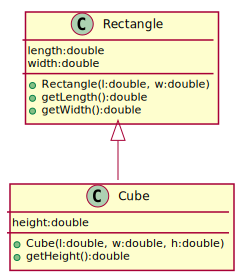

In [3]:
%%plantuml
@startuml
class Rectangle {
    length:double
    width:double
    +Rectangle(l:double, w:double)
    +getLength():double
    +getWidth():double
}
class Cube {
    height:double
    +Cube(l:double, w:double, h:double)
    +getHeight():double
}
Rectangle <|-- Cube
@enduml

* 자식클래스 Cube의 생성자는 3개이다. 이 가운데 2개는 부모클래스의 요소이다.
* super()는 부모클래스의 생성자를 호출한다.

In [3]:
class Cube extends Rectangle {
    double height;
    public Cube(double l, double w, double h) {
        super(l,h);
        this.height=w;
    }
    public double getHeight() {
        return height;
    }
}

 class Cube extends Rectangle {
     private double height;
     public Cube(double l, double w, double h) {
         super(l,h);
         this.height=w;
     }
     public double getHeight() {
         return height;
     }
 }
|  Added class Cube



In [4]:
Cube c=new Cube(10.0,20.0,30.0);

 Cube c=new Cube(10.0,20.0,30.0);
|  Added variable c of type Cube with initial value Cube@57fffcd7



* 상속받은 함수도 모두 호출할 수 있다.

In [5]:
c.getLength();

 c.getLength();
|  Expression value is: 10.0
|    assigned to temporary variable $4 of type double



## 7.3 Fields

* 상속관계에서 부모의 속성을 사용할 수 있다.
* 상속관계에서도 가시성을 제한하면, 자식클래스에서 사용할 수 없다.
    * private 상속관계에서 자식클래스가 사용할 수 없다.
    * protected 상속관계에서 자식클래스가 사용할 수 있다.


### 7.3.1 protected 상속

In [18]:
class Rectangle {
    protected double length;
    protected double width;
    protected boolean isSelected;
    public Rectangle(double l, double w) {
        this.length=l;
        this.width=w;
    }
    public double getLength() {
        return length;
    }
    public double getWidth() {
        return width;
    }
    public void setSelected(boolean b) {
        isSelected=b;
    }
    public boolean getSelected() {
        return isSelected;
    }
}

 class Rectangle {
     protected double length;
     protected double width;
     protected boolean isSelected;
     public Rectangle(double l, double w) {
         this.length=l;
         this.width=w;
     }
     public double getLength() {
         return length;
     }
     public double getWidth() {
         return width;
     }
     public void setSelected(boolean b) {
         isSelected=b;
     }
     public boolean getSelected() {
         return isSelected;
     }
 }
|  Added class Rectangle



In [19]:
Rectangle myrect=new Rectangle(10.0, 20.0)
myrect.getLength();
myrect.setSelected(false);
myrect.getSelected();

 Rectangle myrect=new Rectangle(10.0, 20.0)
|  Added variable myrect of type Rectangle with initial value Rectangle@52a86356

 myrect.getLength();
|  Expression value is: 10.0
|    assigned to temporary variable $41 of type double

 myrect.setSelected(false);

 myrect.getSelected();
|  Expression value is: false
|    assigned to temporary variable $43 of type boolean



* protected field는 출력할 수 있다.
    * 다른 클래스에서 출력할 수 있을까? 같은 상속에서는 허용.

In [39]:
myrect.length;

 myrect.length;
|  Expression value is: 10.0
|    assigned to temporary variable $33 of type double



## 문제 oo-1: 도형을 선택하여 그룹을 만들 수 있다. 선택된 도형을 알아내기.

* 출석을 생각해 보자. 학생이 출석했는지 누가 알아야 하는가? 출석과 출석기록으로 나누어 생각해 본다.
    * 출석은 학생이 한다.
    * 출석부 기재는 교수가 한다. 여러 학생을 기록해야 하기 때문이다.
* 도형으로 생각해 보기. 도형을 선택한 후, 삭제하거나 움직이거나 복사하거나 크기를 줄이거나 하는 경우이다.
    * 선택은 도형의 함수이다.
    * 선택된 것을 기록하는 클래스가 필요하다. 도형은 여러 개이다. 그룹으로 해야 할 작업이 있다.
* 구현의 관점에서 생각해 보기
    * 도형은 상속으로 구현할 수 있다.
    * 선택은 관련 클래스로 구현할 수 있다.
        * Selection 클래스를 구현한다.
            * Selection클래스는 도형을 변경하기 위해 선택하는 기능을 가지고 있다.
            * 도형을 선택한 경우, setSelected()함수를 사용한다. 


구분 | isa | hasa
-------|-------|-------
관계 | 상속 | 연관, 포함
언제 사용 | 모든 것을 사용할 경우 | 일부만 사용할 경우


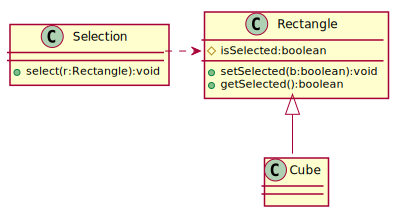

In [7]:
%%plantuml
@startuml
class Rectangle {
    #isSelected:boolean
    +setSelected(b:boolean):void
    +getSelected():boolean
}
class Cube
class Selection {
    +select(r:Rectangle):void
}
Rectangle <|-- Cube
Selection .right.> Rectangle
@enduml

In [20]:
class Selection {
    Selection(){}
    public void select(Rectangle r) {
        r.setSelected(true);
        System.out.println("selected: "+r.isSelected);
    }
}

 class Selection {
     Selection(){}
     public void select(Rectangle r) {
         r.setSelected(true);
         System.out.println("selected: "+r.isSelected);
     }
 }
|  Added class Selection



In [21]:
Selection s=new Selection();

 Selection s=new Selection();
|  Added variable s of type Selection with initial value Selection@6d7b4f4c
|    Update modified class CoffeeBeans
|    Update modified class Arabica



In [23]:
Rectangle r=new Rectangle(20,30);
s.select(r);

 Rectangle r=new Rectangle(20,30);
|  Modified variable r of type Rectangle with initial value Rectangle@731a74c
|    Update overwrote variable r

 s.select(r);
selected: true



* 도형이 선택되었는지 getSelected()를 사용해서 알 수 있다.
* boolean을 반환할 경우, 함수명이 isSelected()로 변경할 수 있다.

In [25]:
r.getSelected();

 r.getSelected();
|  Expression value is: true
|    assigned to temporary variable $50 of type boolean



### 7.3.2 private의 상속

* 거북이 사례를 사용하여 구현한다.
* private은 상속이 되지 않는다.

특징 | 바다거북 | 육지거북
-----|-----|-----
거주 | 주로 바다 | 건조한 지역
수영 | 수영할 수 있다 | 수영할 수 없다
먹이 | 해조류 | 풀, 선인장
발모양 | 물발퀴 | 물갈퀴 퇴화
발톱 | 퇴화 | 발달



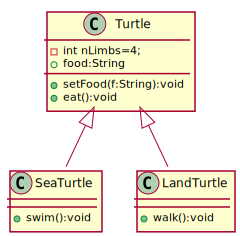

In [8]:
%%plantuml
@startuml
class Turtle {
    -int nLimbs=4;
    +food:String
    +setFood(f:String):void
    +eat():void
}
class SeaTurtle {
    +swim():void
}
class LandTurtle {
    +walk():void
}
Turtle <|-- SeaTurtle
Turtle <|-- LandTurtle
@enduml

In [1]:
class Turtle {
    private int nLimbs=4;
    protected String food;
    public void setFood(String f) {
        this.food=f;
    }
    public void eat() {
        System.out.print("Turtle eats "+food);
    }   
}
class SeaTurtle extends Turtle {
    public void swim() {
        System.out.print("A sea turtle swims...");
    }
}
class LandTurtle extends Turtle {
    public void walk() {
        System.out.print("A land turtle walks...");
    }
}

 class Turtle {
     private int nLimbs=4;
     protected String food;
     public void setFood(String f) {
         this.food=f;
     }
     public void eat() {
         System.out.print("Turtle eats "+food);
     }   
 }
|  Added class Turtle

 class SeaTurtle extends Turtle {
     public void swim() {
         System.out.print("A sea turtle swims...");
     }
 }
|  Added class SeaTurtle

 class LandTurtle extends Turtle {
     public void walk() {
         System.out.print("A land turtle walks...");
     }
 }
|  Added class LandTurtle



* 가시성 priviate은 상속할 수 없다.

In [6]:
SeaTurtle st=new SeaTurtle();
st.nLimbs;

 SeaTurtle st=new SeaTurtle();
|  Modified variable st of type SeaTurtle with initial value SeaTurtle@5700d6b1
|    Update overwrote variable st

 st.nLimbs;
|  Error:
|  nLimbs has private access in Turtle
|  st.nLimbs;
|  ^-------^



* 다형성

In [9]:
Turtle t=new Turtle();
SeaTurtle st=new SeaTurtle();
LandTurtle lt=new LandTurtle();
st.setFood("seaweeds");
lt.setFood("plants");
t.eat();
st.eat();
lt.eat();

 Turtle t=new Turtle();
|  Modified variable t of type Turtle with initial value Turtle@2d928643
|    Update overwrote variable t

 SeaTurtle st=new SeaTurtle();
|  Modified variable st of type SeaTurtle with initial value SeaTurtle@5025a98f
|    Update overwrote variable st

 LandTurtle lt=new LandTurtle();
|  Modified variable lt of type LandTurtle with initial value LandTurtle@49993335
|    Update overwrote variable lt

 st.setFood("seaweeds");

 lt.setFood("plants");

 t.eat();
Turtle eats null
 st.eat();
Turtle eats seaweeds
 lt.eat();
Turtle eats plants


## 문제 oo-2: 상속을 사용하여 거북이를 구현한다. 

* 거북이 사례의 nLimbs 팔다리 갯수를 자식클래스에서 사용할 수 있게 한다.

## 문제 oo-3: 원의 면적을 계산하기.

* Point클래스를 구현하고 Circle클래스를 자식클래스로 구현한다.
    * 단계1: 공통 속성, 함수가 있는지 찾는다.
        * Point클래스는 위치(x,y)를 가진다.
        * Circle클래스는 위치(x,y)를 사용한다. 그리고 반지름을 추가한다.
        * 자식클래스에서 사용하지 않는 속성은 private로 한다.
    * 단계2: subclass에 특화된 속성, 함수가 있는지 찾는다.
        * Point클래스는 면적을 계산하지 않는다.
        * Circle클래스는 면적을 계산한다.

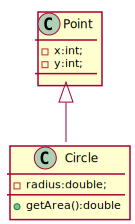

In [9]:
%%plantuml
@startuml
class Point {
    -x:int;
    -y:int;
}
class Circle {
    -radius:double;
    +getArea():double
}

Point <|-- Circle
@enduml

In [27]:
class Point {
    private int x;
    private int y;
    public Point() {}
    public Point(int xnew, int ynew) {
        this.x=xnew;
        this.y=ynew;
    }
    public int getX() {
        return x;
    }
    public int getY() {
        return y;
    }
    public String toString() {
        String msg="("+x+","+y+")";
        return msg;
    }
}

 class Point {
     private int x;
     private int y;
     public Point() {}
     public Point(int xnew, int ynew) {
         this.x=xnew;
         this.y=ynew;
     }
     public int getX() {
         return x;
     }
     public int getY() {
         return y;
     }
     public String toString() {
         String msg="("+x+","+y+")";
         return msg;
     }
 }
|  Added class Point



In [28]:
class Circle extends Point {
    private double radius;
    public Circle(){}
    public Circle(int xnew, int ynew, double rnew) {
        super(xnew, ynew);
        this.radius=rnew;
    }
    public double getRadius() {
        return radius;
    }
    public double getCircumference() {
        return 2*Math.PI*getRadius();
    }
    public double getArea() {
        return Math.PI*getRadius()*getRadius();
    }
}

 class Circle extends Point {
     private double radius;
     public Circle(){}
     public Circle(int xnew, int ynew, double rnew) {
         super(xnew, ynew);
         this.radius=rnew;
     }
     public double getRadius() {
         return radius;
     }
     public double getCircumference() {
         return 2* Math.PI * getRadius();
     }
     public double getArea() {
         return Math.PI *getRadius()*getRadius();
     }
 }
|  Added class Circle



In [6]:
Circle myCircle=new Circle(10,10,5);
Double myArea=myCircle.getArea();
System.out.println(myArea);

 Circle myCircle=new Circle(10,10,5);
|  Added variable myCircle of type Circle with initial value (10,10)

 Double myArea=myCircle.getArea();
|  Added variable myArea of type Double with initial value 78.53981633974483

 System.out.println(myArea);
78.53981633974483



## 7.4 Interface 상속

## 7.4.1 interface란 

* 인터페이스는 함수만을 가진다. 함수는 자식클래스에서 구현한다.
* 인터페이스는 객체를 생성할 수 없다.
* 인터페이스는 Object class에서 물려 받지 않는다 (자바 문서 확인)

## 7.4.2 abstract class와 비교

* '인터페이스'는 '추상클래스'와 자주 비교된다.
    * 추상클래스에서 속성을 제외하고, 모든 함수를 추상으로 정의하는 경우에는 인터페이스와 동일하다
    * 아닌 경우, 다르다

구분 | 인터페이스 | 추상클래스
-------|-------|-------
속성을 가질 수 있다 |  없다 | 있다
함수를 가질 수 있다 | 있다 | 없다
함수를 구현할 수 있다 | 없다 | 있다
객체를 생성할 수 있다 | 없다 | 없다 (추상클래스인 경우)

* 왜 인터페이스를 사용하는가?
    * 함수 API를 정의한다. 어떤 입력을 사용해서, 어떤 결과를 반환해야 하는지를 결정한다.
    * 이와 같이 구현되지 않는 함수를 정의한다는 점에서 'marker'라고 한다.
    * 반면, 추상클래스는 함수의 구현을 상속할 수 있다. 자식클래스에서 재정의하지 않으면, 부모의 것을 default로 사용한다.

* 자바는 다중상속을 할 수 없지만, 인터페이스를 사용하여 다중상속을 할 수 있다.
    * 클래스를 다중상속 할 수 없다. 여러 클래스를 확장할 수 없다.
    * 여러 인터페이스를 구현한다.
* 클래스A는 클래스B를 확장한다. 추가적인 확장은 할 수 없다. 인터페이스 C,D를 사용하여 다중구현을 해서 보완한다.

In [1]:
import iplantuml

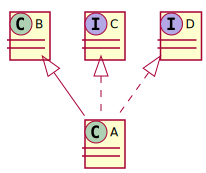

In [5]:
%%plantuml
@startuml
class A
class B
interface C
interface D
B <|-- A 
C <|.. A
D <|.. A
@enduml

In [1]:
interface A{}
interface B{}
class C{}
class D extends C implements A,B {}

 interface A{
 }
|  Added interface A

 interface B{
 }
|  Added interface B

 class C{
 }
|  Added class C

 class D extends C implements A,B {
 }
|  Added class D



* 인터페이스는 다른 인터페이스를 상속할 수 있다.

In [20]:
interface A{}
interface B extends A{}

 interface A{}
|  Modified interface A
|    Update overwrote interface A

 interface B extends A{}
|  Added interface B



* 인터페이스 구현
    * Rectangle클래스는 Shape 인터페이스를 구현한다.
    ```
    class Rectangle implements Shape
    ```

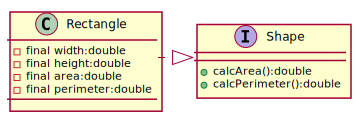

In [13]:
%%plantuml
@startuml
interface Shape {
    +calcArea():double
    +calcPerimeter():double
}
class Rectangle {
    -final width:double
    -final height:double
    -final area:double
    -final perimeter:double
}
Rectangle .right.|> Shape
@enduml

In [11]:
public interface Shape {
    public double calcArea();
    public double calcPerimeter();
}

 public interface Shape {
     public double calcArea();
     public double calcPerimeter();
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public interface Shape {
|  ^----^
|  Replaced interface Shape this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public interface Shape {
|      ^----^
|    Update overwrote class Shape



In [12]:
public class Rectangle implements Shape {
  private final double width, height, area, perimeter;

  public Rectangle(double width, double height) {
    this.width = width;
    this.height= height;
    this.area = width * height;
    this.perimeter = 2 * (width + height);
  }

  @Override
  public double calcArea() {
    return this.area;
  }

  @Override
  public double calcPerimeter() {
    return this.perimeter;
  }
}

 public class Rectangle implements Shape {
   private final double width, height, area, perimeter;
 
   public Rectangle(double width, double height) {
     this.width = width;
     this.height= height;
     this.area = width * height;
     this.perimeter = 2 * (width + height);
   }
 
   @Override
   public double calcArea() {
     return this.area;
   }
 
   @Override
   public double calcPerimeter() {
     return this.perimeter;
   }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class Rectangle implements Shape {
|  ^----^
|  Added class Rectangle this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class Rectangle implements Shape {
|      ^----^



## 7.5 abstract class

* Shape의 사례를 추상클래스를 사용하여 구현한다.
    * abstract method
        * body가 없다. 구현하지 않는다.
        * 하위 클래스는 모두 구현해야 한다. 이를 위해 overriding이라고 한다.

* 선언부에 클래스를 abstract으로 정의한다.
    ```
    abstract class Shape
    ```
    
* 클래스의 멤버함수
    * abstract으로 선언하고, 자식클래스에서 재정의할 수 있다.
    * abstract으로 선언하지 않으면, 자식클래스에서 선택적으로 재정의할 수 있다.

## 문제 oo-4: 클래스 상속을 사용하여 도형의 면적을 구하기

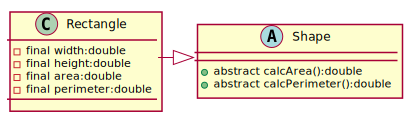

In [14]:
%%plantuml
@startuml
abstract class Shape {
    +abstract calcArea():double
    +abstract calcPerimeter():double
}
class Rectangle {
    -final width:double
    -final height:double
    -final area:double
    -final perimeter:double
}
Rectangle -right-|> Shape
@enduml

In [29]:
public abstract class Shape {
    public String name="Shape";
    public abstract double calcArea();
    public abstract double calcPerimeter();
    public String getName() { return this.name; }
    public String toString() {
        return "Shape..."+super.toString();
    }
}

 public abstract class Shape {
     public String name="Shape";
     public abstract double calcArea();
     public abstract double calcPerimeter();
     public String getName() { return this.name; }
     public String toString() {
         return "Shape..."+super.toString();
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public abstract class Shape {
|  ^-------------^
|  Added class Shape this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public abstract class Shape {
|      ^-------------^



In [18]:
public class Rectangle extends Shape {
    private final double width, height, area, perimeter;
    public Rectangle(double width, double height) {
        this.width = width;
        this.height= height;
        this.area = width * height;
        this.perimeter = 2 * (width + height);
    }
    @Override
    public double calcArea() {
        return this.area;
    }
    @Override
    public double calcPerimeter() {
        return this.perimeter;
    }
    public String toString() {
        return "Rectangle..."+super.toString();
    }
}

 public class Rectangle extends Shape {
     private final double width, height, area, perimeter;
 
     public Rectangle(double width, double height) {
         this.width = width;
         this.height= height;
         this.area = width * height;
         this.perimeter = 2 * (width + height);
     }
     @Override
     public double calcArea() {
         return this.area;
     }
     @Override
     public double calcPerimeter() {
         return this.perimeter;
     }
     public String toString() {
         return "Rectangle..."+super.toString();
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class Rectangle extends Shape {
|  ^----^
|  Added class Rectangle this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class Rectangle extends Shape {
|      ^----^



In [19]:
public class Circle extends Shape {
    private final double radius, area, perimeter;

    public Circle(double radius) {
        this.radius = radius;
        this.area = Math.PI * radius * radius;
        this.perimeter = 2 * Math.PI * radius;
    }
    @Override
    public double calcArea() {
        return this.area;
    }
    @Override
    public double calcPerimeter() {
        return this.perimeter;
    }
    public String toString() {
        return "Circle..."+super.toString();
    }
}

 public class Circle extends Shape {
     private final double radius, area, perimeter;
 
     public Circle(double radius) {
         this.radius = radius;
         this.area = Math.PI * radius * radius;
         this.perimeter = 2 * Math.PI * radius;
     }
     @Override
     public double calcArea() {
         return this.area;
     }
     @Override
     public double calcPerimeter() {
         return this.perimeter;
     }
     public String toString() {
         return "Circle..."+super.toString();
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class Circle extends Shape {
|  ^----^
|  Added class Circle this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class Circle extends Shape {
|      ^----^



In [17]:
Rectangle r=new Rectangle(3,4);
Circle c=new Circle(5);

 Rectangle r=new Rectangle(3,4);
|  Added variable r of type Rectangle with initial value Rectangle...Shape ...Rectangle@4bec1f0c

 Circle c=new Circle(5);
|  Added variable c of type Circle with initial value Circle...Shape ...Circle@2d928643



In [18]:
r.calcArea();
c.calcArea();

 r.calcArea();
|  Expression value is: 12.0
|    assigned to temporary variable $18 of type double

 c.calcArea();
|  Expression value is: 78.53981633974483
|    assigned to temporary variable $19 of type double



## 7.6 Polymorphism: 

* 다형성
    * 부모클래스의 참조가 자식클래스를 가리키고 있을 때, 자식클래스의 함수가 호출될 수 있다.
    * 런타임에 자식클래스의 호출할 함수가 결정된다.
    * 동적바인딩이라고 한다.
        * C++에서는 RTTI (Run Time Type Identification)

* 다형성을 사용하려면:
    * 상속관계
        * upcasting - 상속계층에서 suptype에서 supertype으로 
    * overriding 함수
        * subtype 고유의 함수는 upcasting하면서 사라짐 (losing access to subtype features)

* 동적 vs 정적 바인딩
    * 동적바인딩은 '런타임 시점'에 '객체에 할당된 참조'에 따라 사용할 함수를 '동적'으로 결정한다.
    * 정적바인딩은 '컴파일 시점'에 '클래스 타잎'에 따라 '정적'으로 결정한다.

구분 | dynamic binding | static binding
-------|-------|-------
발생시점 | 런타임 | 컴파일타임
적용 | 재정의 함수 | 재정의되지 않은 경우. private, final, static
사용정보 | 객체 | 클래스


* 다형성을 사용하기 위해 부모클래스에 자식클래스의 객체를 할당한다.
    * 자식클래스 SeaTurtle의 객체가 부모클래스 Turtle에 할당
    * upcasting을 하면, 부모클래스가 자식클래스의 참조를 가진다.
    * 재정의한 함수를 다형적으로 호출 할 수 있다.

In [2]:
Turtle t=new SeaTurtle();

 Turtle t=new SeaTurtle();
|  Added variable t of type Turtle with initial value SeaTurtle@598067a5



* 이런 경우, 자식클래스 SeaTurtle 고유의 함수 swim()은 사라짐

In [3]:
t.swim();

 t.swim();
|  Error:
|  cannot find symbol
|    symbol:   method swim()
|  t.swim();
|  ^----^



* upcasting한 후, 다시 downcasting할 수 있다.
    * upcasting한 객체에서 downcasting해야 한다.
    * downcast는 '명시적'으로 해야 한다 (upcast는 자동으로 이루어진다).

In [6]:
SeaTurtle stFromTurtle = (SeaTurtle)t;

 SeaTurtle stFromTurtle = (SeaTurtle)t;
|  Modified variable stFromTurtle of type SeaTurtle with initial value SeaTurtle@598067a5
|    Update overwrote variable stFromTurtle



In [7]:
stFromTurtle.swim();

 stFromTurtle.swim();
A sea turtle swims...


* supertype의 함수를 실행할 수 있다. 이 함수를 overriding하는 경우 subtype의 eat()이 실행된다.

In [5]:
t.eat();

 t.eat();
Turtle eats null


In [6]:
class SeaTurtle extends Turtle {
    public void swim() {
        System.out.print("A sea turtle swims...");
    }
    public void eat(){
        System.out.print("A sea turtle eats "+food);
    }
}

 class SeaTurtle extends Turtle {
     public void swim() {
         System.out.print("A sea turtle swims...");
     }
     public void eat(){
         System.out.print("A sea turtle eats "+food);
     }
 }
|  Replaced class SeaTurtle
|    Update overwrote class SeaTurtle



* setFood()는 supertype의 함수
* supertype의 setFood()를 실행해서 먹이를 설정한다.
    ```
    t.setFood("seaweeds");
    ```

* t.eat()은 다형성이 실행된다.
    * supertyep의 eat()이 실행될지, suptype의 eat()이 실행될지 모른다.
    * late binding이란 실행시점에 subtype seaturtle의 eat()이 실행된다.
    ```
    t.eat();
    ```

In [7]:
t.setFood("seaweeds");
t.eat();

 t.setFood("seaweeds");

 t.eat();
Turtle eats seaweeds


## 문제  oo-5: 객체를 배열로 저장해서, sayHello 하기

* Hello 객체를 배열로 저장해서, 모든 객체가 sayHello() 호출하기.
* 앞서 만들었던 Hello 클래스를 사용한다.
* 프로그래밍 요소
    * 객체의 배열 - 배열은 원시 타잎, 객체 타잎 모두 저장할 수 있다.
    * 다형성 - 객체의 함수를 반복문에서 일괄 호출할 수 있다.

In [ ]:
class Hello {
    private String name;
    public Hello(String name) {
        this.name=name;
    }
    public void sayHello() {
        System.out.println("hello " + name);
    }
}

* 객체의 배열을 선언한다.
* Array는 저장 갯수를 미리 정해야 한다. -> 갯수를 임의로 늘릴 수 없다.

In [ ]:
Hello[] h=new Hello[5];

h[0]=new Hello("js1");
h[1]=new Hello("js2");

* h를 출력하면 toString을 호출하게 됨. 객체의 hash code를 출력한다.
* 저장된 객체가 없는 경우에는 null을 출력한다.

In [ ]:
for(int i=0;i<5;i++)
    System.out.println(h[i]);

* 객체를 출력할 때는 함수명을 사용

In [ ]:
for(int i=0;i<h.length;i++)
    h[i].sayHello();

* 객체를 출력하는 반복문이다.

In [ ]:
for(Hello e:h)
    e.sayHello();

## 7.7 equals

* 다형성은 어느 객체를 사용할 것인지 판별하는 것이 필요하다.
* 상속관계의 부모클래스와 자식클래스는 같지 않아야 한다.
* 판별하는 함수는 instanceof와 getClass()가 있다.
    * instanceOf는 부모클래스와 자식클래스를 동일한 객체로 본다.
    * getClass()는 부모클래스와 자식클래스라고 하더라도, 동일한 객체가 아니다.

* equals의 5가지 조건

특징 | 설명 | 예
-------|-------|-------
reflexivity | 자신과 비교하면 동일 | x.equals(x)는 true
symmetry | x=y이면 y=x | x.equals(y)이면 y.equals(x)
transitivity | x=y, y=z이면 z=x | x.equals(y) y.equals(z), z.equals(y)
consistency | 상태가 변경이 되어도 true | hashCode()가 다른 경우, 시점이 지나면 다를 수 있다.
non-nullity | x==not null | x.equals(null)

* equals를 override할 경우, hashcode도 override한다.



* reflexive

In [ ]:
SeaTurtle st=new SeaTurtle();

st.equals(st);

* symmetric

In [ ]:
Turtle t=new Turtle();

t.equals(st);

st.equals(t);

st.getClass();

t.getClass();

## 문제 oo-6:  도형을 다형적으로 면적 계산하기

* 부모클래스 Shape[]에 자식클래스를 저장하고 (예: Circle, Rectangle)
* 부모클래스 Shape.draw()를 호출하면 자식클래스 subtype.draw()가 실행되는 것.
    * version 1: instanceof
    * version 2: 다형성

In [20]:
Rectangle r=new Rectangle(3,4);
Circle c=new Circle(5);

 Rectangle r=new Rectangle(3,4);
|  Added variable r of type Rectangle with initial value Rectangle...Shape...Rectangle@598067a5

 Circle c=new Circle(5);
|  Added variable c of type Circle with initial value Circle...Shape...Circle@56ac3a89



* instanceof vs getClass

함수 | 설명 | 예제
----------|----------|----------
instanceof | 좌측(참조값)이 우측(클래스 또는 하위)의 객체이면 1, 아니면 0 | r instanceof Rectangle
getClass() | ==를 사용. 좌측(클래스)이 우측(클래스)과 동일한 타잎이면 1, 아니면 0 | r.getClass() == Rectangle.class



* r은 Rectangle이면서 Shape(r의 superclass)의 객체

In [22]:
if(r instanceof Shape && r instanceof Rectangle) {
    System.out.print(r.toString());
}

 if(r instanceof Shape && r instanceof Rectangle) {
     System.out.print(r.toString());
 }
Rectangle...Shape...REPL.$REPL13$Rectangle@598067a5


* r.getClass()는 r의 클래스를 돌려준다.
    ```
    public final Class getClass()
    ```
    * 우측에는 클래스를 적어준다. instanceof와 달리 클래스가 같아야 한다.

In [27]:
r.getClass() == Rectangle.class

 r.getClass() == Rectangle.class
|  Expression value is: true
|    assigned to temporary variable $9 of type boolean



In [28]:
r.getClass() == Shape.class

 r.getClass() == Shape.class
|  Error:
|  incomparable types: java.lang.Class<capture#1 of ? extends Rectangle> and java.lang.Class<Shape>
|  r.getClass() == Shape.class
|  ^-------------------------^



### instanceof를 사용하는 경우와 다형성을 사용하는 경우 비교



```
Shape[] s=new Shape[2];
s[0]=new Rectangle(3,4);
s[1]=new Circle(5);
```

```
s[0] instanceof Rectangle
```

In [33]:
Shape[] s=new Shape[2];
s[0]=r;
s[1]=c;

 Shape[] s=new Shape[2];
|  Modified variable s of type Shape[] with initial value [LShape;@1ed4004b
|    Update overwrote variable s

 s[0]=r;
|  Expression value is: Rectangle...Shape...Rectangle@598067a5
|    assigned to temporary variable $15 of type Shape

 s[1]=c;
|  Expression value is: Circle...Shape...Circle@56ac3a89
|    assigned to temporary variable $16 of type Shape



In [35]:
for(Shape my:s) {
    if(my instanceof Rectangle) {
        System.out.println(my.toString());
    } else if (my instanceof Circle) {
        System.out.println(my.toString());    
    }
}

 for(Shape my:s) {
     if(my instanceof Rectangle) {
         System.out.println(my.toString());
     } else if (my instanceof Circle) {
         System.out.println(my.toString());    
     }
 }
Rectangle...Shape...REPL.$REPL13$Rectangle@598067a5
Circle...Shape...REPL.$REPL14$Circle@56ac3a89



### 다형성

* subtype 다형성을 사용하면, intanceOf를 사용하지 않게 된다.

```
if (superclass instanceof Subclass) {
   Subclass subclass = (Subclass) superclass;
   subclass.method();
}
```

In [34]:
for(Shape my:s)
    System.out.println(my.toString());

 for(Shape my:s)
     System.out.println(my.toString());
Rectangle...Shape...REPL.$REPL13$Rectangle@598067a5
Circle...Shape...REPL.$REPL14$Circle@56ac3a89

